In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime, timedelta

In [78]:
def monte_carlo_combined(ticker, start_date, num_simulations=1000, days=365):
    stock_data = yf.download(ticker, start=start_date)
    stock_data["Returns"] = np.log(
        stock_data["Close"] / stock_data["Close"].shift(1)
    )  # Adjusted returns

    mean_return = stock_data["Returns"].mean()
    volatility = stock_data["Returns"].std()
    last_price = stock_data["Close"].iloc[-1]

    simulations = np.zeros((num_simulations, days))

    for sim in range(num_simulations):
        price_series = np.zeros(days)
        price_series[0] = float(last_price.iloc[0])
        for i in range(1, days):
            price_series[i] = price_series[i - 1] * np.exp(
                np.random.normal(mean_return, volatility)
            )  # Log-normal scaling
        simulations[sim, :] = price_series

    final_prices = simulations[:, -1]  # Extract final prices from all simulations
    median_prices = np.median(simulations, axis=0)  # Compute median trajectory

    # Get the actual future prediction date
    prediction_date = (datetime.today() + timedelta(days=days)).strftime("%B %d, %Y")

    p5, p50, p95 = np.percentile(final_prices, [5, 50, 95])
    print(
        f"Monte Carlo Simulation for {ticker} - Projected Price on {prediction_date}:"
    )
    print(f"5th Percentile (Low Risk Estimate): ${p5:.2f}")
    print(f"Median Price (Most Likely Outcome): ${p50:.2f}")
    print(f"95th Percentile (High Reward Estimate): ${p95:.2f}\n")

    # Probability distribution plot (Histogram)
    plt.figure(figsize=(12, 6))
    sns.histplot(final_prices, bins=50, kde=True, color="blue", alpha=0.6)

    # Mark confidence intervals
    plt.axvline(p5, color="red", linestyle="dashed", label="5th Percentile (Low Risk)")
    plt.axvline(
        p50,
        color="black",
        linestyle="dashed",
        label="Median Price (Most Likely Outcome)",
    )
    plt.axvline(
        p95, color="green", linestyle="dashed", label="95th Percentile (High Reward)"
    )
    plt.title(
        f"Probability Distribution of {ticker} Stock Price Over {days} Days ({prediction_date})"
    )
    plt.xlabel("Projected Stock Price, $")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Monte Carlo Simulation Paths
    historical_prices = stock_data["Close"][-days:]  # Extract last historical prices
    plt.figure(figsize=(12, 6))

    # Plot simulated paths
    plt.plot(simulations.T, alpha=0.05, color="blue")

    # # Overlay median trajectory (trend indicator)
    # plt.plot(median_prices, color='black', linewidth=2, label="Median Monte Carlo Projection")

    # Overlay actual historical prices for comparison
    plt.plot(
        range(len(historical_prices)),
        historical_prices,
        color="red",
        linewidth=2,
        label=f"Historical trajectory for last {days} days",
    )

    plt.title(f"Monte Carlo Simulation with Trends for {ticker} Over {days} Days")
    plt.xlabel("Days")
    plt.ylabel("Projected Stock Price, $")
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


Monte Carlo Simulation for TGT - Projected Price on June 04, 2026:
5th Percentile (Low Risk Estimate): $51.78
Median Price (Most Likely Outcome): $103.04
95th Percentile (High Reward Estimate): $202.32



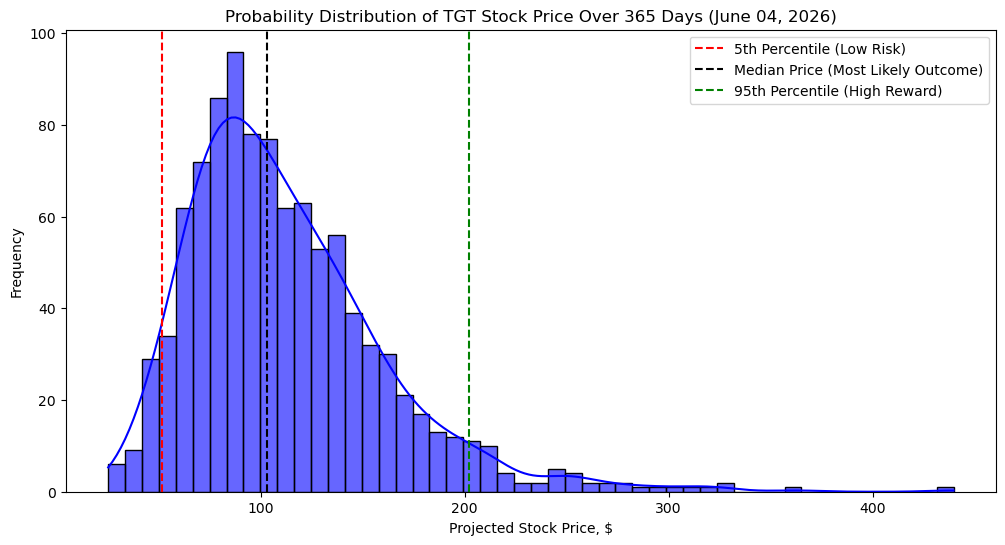

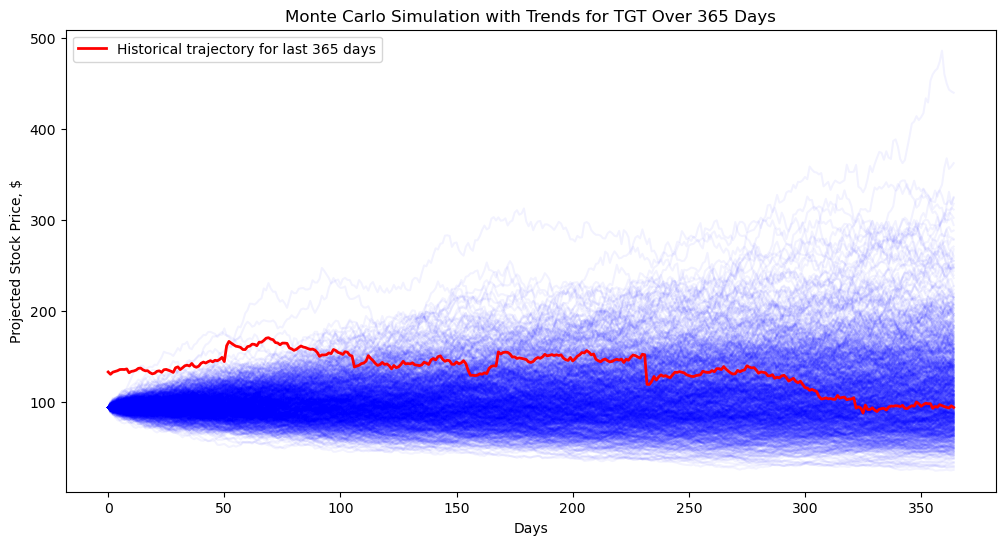

In [79]:
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()  # Convert to uppercase for consistency
start_date = "2018-01-01"
monte_carlo_combined(tckr, start_date)